In [26]:
import matplotlib.pyplot as plt
import pathlib
import json

First implete a single plot version, later will support plotting on various versions and comparison.

In [27]:
def read_log(log_file):
    with open(log_file) as f:
        # read one line by json
        lines_data = [json.loads(line) for line in f.readlines()]

    # STAT_ITEMS = ['build_cycles', 'build_flops', 'traverse_cycles', 'total_flops', 'build_nodes']
    res = {}
    res['tri_num'] = [line['tri_num'] for line in lines_data]
    res['build_cycles'] = [line['build_cycles'] for line in lines_data]
    res['traverse_cycles'] = [line['traverse_cycles'] for line in lines_data]
    res['build_flops'] = [line['build_flops'] for line in lines_data]
    # res['traverse_flops'] = [line['traverse_flops'] for line in lines_data]
    res['traverse_flops'] = [line['total_flops'] - line['build_flops'] for line in lines_data]
    res['run_time'] = [line['run_time'] for line in lines_data]
    
    res['build_perf'] = [res['build_flops'][i] / res['build_cycles'][i] for i in range(len(res['build_flops']))]
    res['traverse_perf'] = [res['traverse_flops'][i] / res['traverse_cycles'][i] for i in range(len(res['traverse_flops']))]
    
    return res
    
def get_exp_name(log_name):
    # '1684844148-quick_count.log'
    return log_name.split('-')[1].split('.')[0]

ouput_dir = pathlib.Path('output')
log_name_list = ['1684883931-baseline.log', '1684919998-quick_count.log']
data = {}
for log_name in log_name_list:
    exp_name = get_exp_name(log_name)
    data[exp_name] = read_log(ouput_dir / log_name)

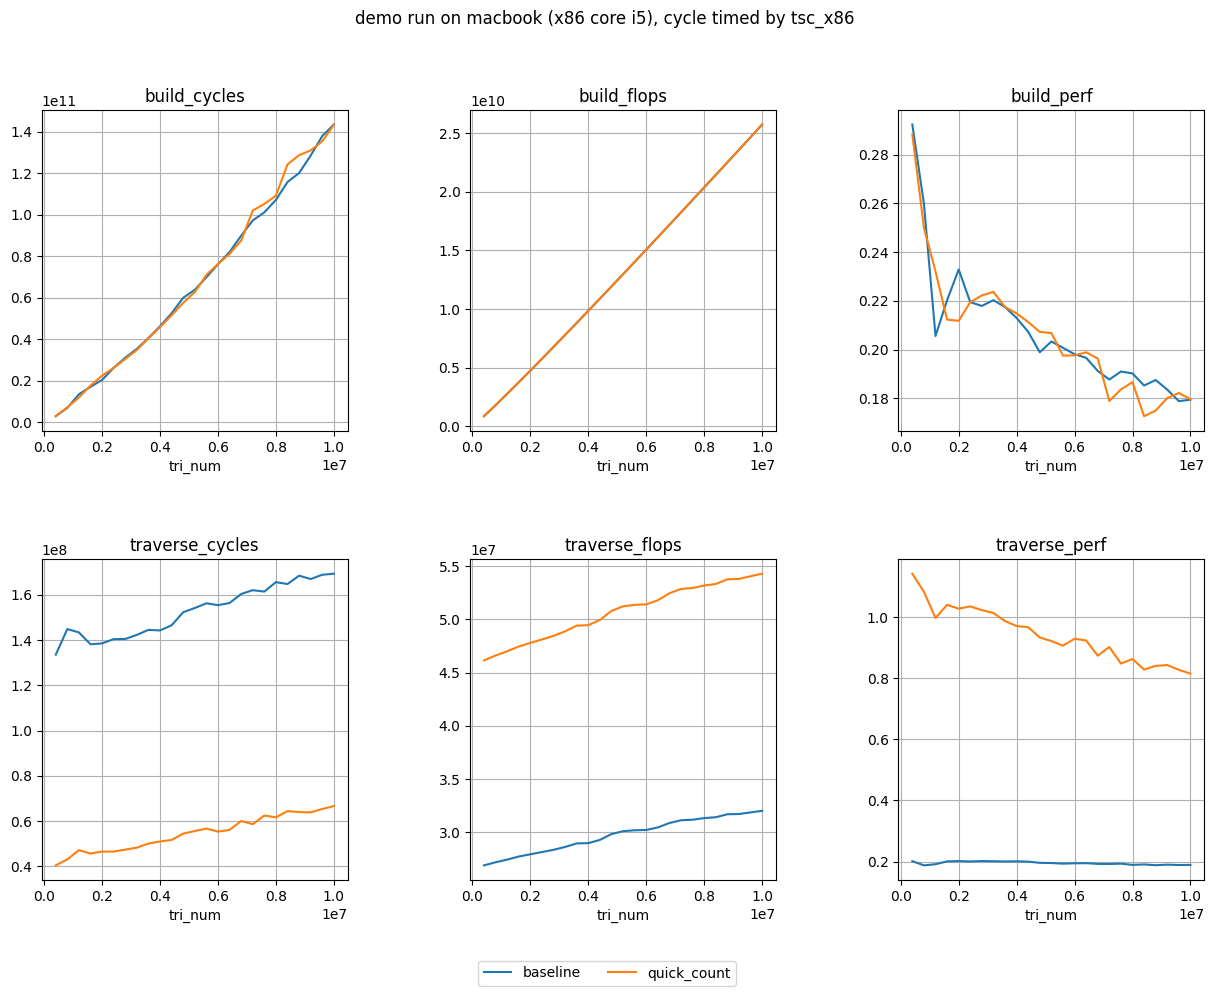

In [30]:
# plot four figures, tri_num is the x axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Set subplot size to (6, 6)
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase margin between subplots
fig.suptitle("demo run on macbook (x86 core i5), cycle timed by tsc_x86")

build_ax = axs[0, 0]
build_flops_ax = axs[0, 1]
build_perf_ax = axs[0, 2]

traverse_ax = axs[1, 0]
traverse_flops_ax = axs[1, 1]
traverse_perf_ax = axs[1, 2]


# TODO(xiaoyuan): more colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, (exp_name, exp_data) in enumerate(data.items()):
    build_ax.plot(exp_data['tri_num'], exp_data['build_cycles'], label=exp_name, color=colors[i])
    build_flops_ax.plot(exp_data['tri_num'], exp_data['build_flops'], label=exp_name, color=colors[i])
    build_perf_ax.plot(exp_data['tri_num'], exp_data['build_perf'], label=exp_name, color=colors[i])
    
    traverse_ax.plot(exp_data['tri_num'], exp_data['traverse_cycles'], label=exp_name, color=colors[i])
    traverse_flops_ax.plot(exp_data['tri_num'], exp_data['traverse_flops'], label=exp_name, color=colors[i])
    traverse_perf_ax.plot(exp_data['tri_num'], exp_data['traverse_perf'], label=exp_name, color=colors[i])

build_ax.set_title('build_cycles')
build_ax.set_xlabel('tri_num')  # Add x-axis label

build_flops_ax.set_title('build_flops')
build_flops_ax.set_xlabel('tri_num')  # Add x-axis label

build_perf_ax.set_title('build_perf')
build_perf_ax.set_xlabel('tri_num')  # Add x-axis label

traverse_ax.set_title('traverse_cycles')
traverse_ax.set_xlabel('tri_num')  # Add x-axis label

traverse_flops_ax.set_title('traverse_flops')
traverse_flops_ax.set_xlabel('tri_num')  # Add x-axis label

traverse_perf_ax.set_title('traverse_perf')
traverse_perf_ax.set_xlabel('tri_num')  # Add x-axis label

# common settings
for ax in axs.flat:
    ax.grid(True)
    
# Add legend
handles, labels = build_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels))

plt.show()
